### **The competition in use machine learing to creat a model that predicts which passengers survived  the Titanic ship**

In [416]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [417]:
# Read data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## **1- Explore Data**

In [418]:
# train.head()
# train.tail()
train.sample()   # one sample from data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
653,654,1,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.8292,NaN,Q


In [419]:
train.shape

(891, 12)

In [420]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [421]:
train.describe() # for numiric data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [422]:
null = train.isnull().sum()
null[null>0]

,0
Age,177
Cabin,687
Embarked,2


<Axes: >

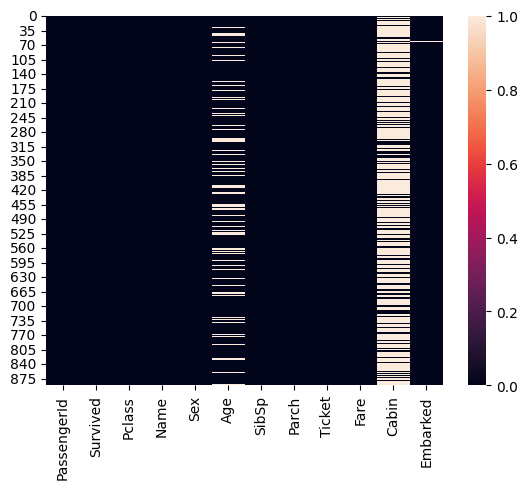

In [423]:
sns.heatmap(train.isnull())

### **2- Clean Data**

In [424]:
# Drop data we dont need
def clean(d):
  d.drop(['Embarked','Fare','Cabin'],axis=1,inplace=True) # Delete coulmns
  d.Age = d.Age.fillna(d.Age.median())
  d.dropna()
  return d

In [425]:
clean(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369


In [426]:
clean(test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298
...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309


<Axes: >

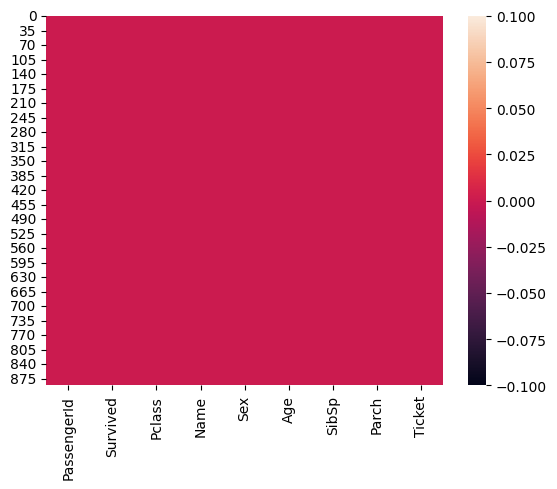

In [427]:
sns.heatmap(train.isnull())

## **3- Data Analysis**

In [428]:
co =train.corr(numeric_only=True)

<Axes: >

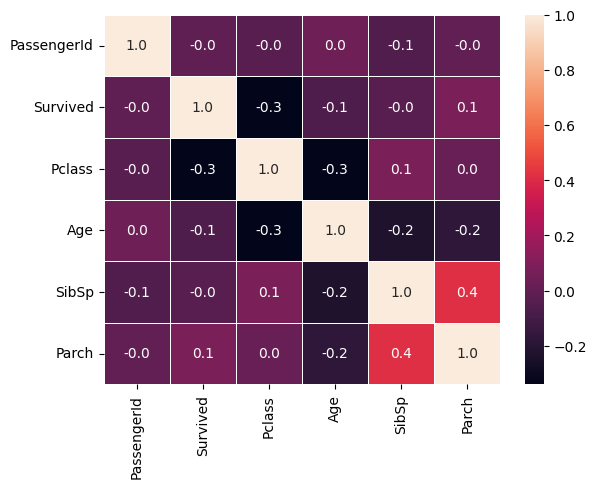

In [429]:
sns.heatmap(co,annot=True,fmt='.1f',linewidths=.5)

In [430]:
train.Survived.value_counts()
# die --> 549
# live --> 342

,count
Survived,
0,549
1,342


In [431]:
train.Sex.value_counts()

,count
Sex,
male,577
female,314


<Axes: ylabel='count'>

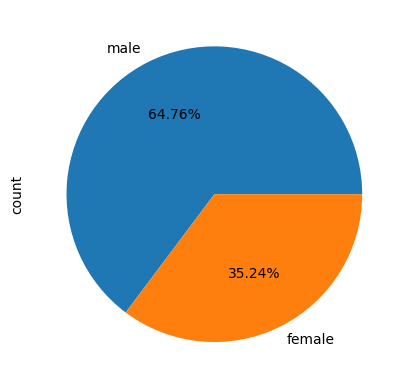

In [432]:
train.Sex.value_counts().plot.pie(autopct='%0.2f%%')

<Axes: xlabel='Sex', ylabel='count'>

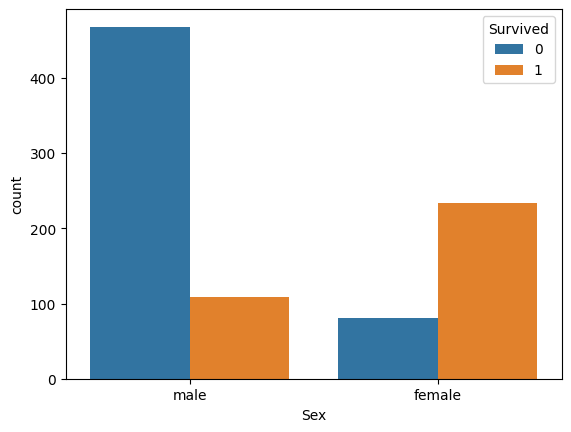

In [433]:
sns.countplot(x="Sex", hue="Survived", data=train)

<Axes: xlabel='Pclass', ylabel='count'>

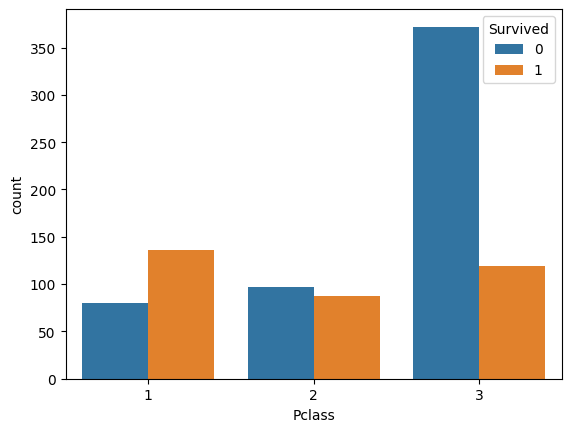

In [434]:
sns.countplot(x="Pclass", hue="Survived", data=train)

<Axes: xlabel='Age', ylabel='Count'>

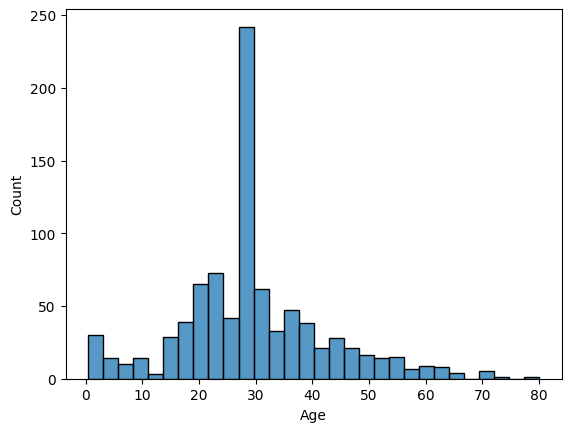

In [435]:
sns.histplot(train.Age)

## **4- Transform Data**

In [436]:
# to transform to numiric data
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [437]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 62.8+ KB


In [438]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 26.3+ KB


In [439]:
train = train.drop(['Name', 'Ticket'], axis=1)

## **5- Creat Model**

In [440]:
x = train.drop(['Survived'],axis=1)
y = train.Survived

In [441]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [442]:
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [443]:
pre = model1.predict(x_test)

In [444]:
accuracy_score(y_test,pre)

0.7150837988826816

In [445]:
accuracies=[]

In [446]:
def all(model):
  model1.fit(x_train,y_train)
  pre = model1.predict(x_test)
  accuracy = accuracy_score(y_test,pre)
  print('Accuracy = ',accuracy)
  accuracies.append(accuracy)

In [447]:
model1 = LogisticRegression()
all(model1)

Accuracy =  0.7877094972067039


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [448]:
model2= RandomForestClassifier()
all(model2)

Accuracy =  0.7877094972067039


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [449]:
model3= GradientBoostingClassifier()
all(model3)

Accuracy =  0.7877094972067039


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [450]:
model4= DecisionTreeClassifier()
all(model4)

Accuracy =  0.7877094972067039


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [451]:
model5 = KNeighborsClassifier()
all(model5)

Accuracy =  0.7877094972067039


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [452]:
model6= GradientBoostingClassifier()
all(model6)

Accuracy =  0.7877094972067039


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [453]:
model7 = SVC()
all(model7)

Accuracy =  0.7877094972067039


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [454]:
model8= GaussianNB()
all(model8)

Accuracy =  0.7877094972067039


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [455]:
Algorithms = ['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier','DecisionTreeClassifier','KNeighborsClassifier','GradientBoostingClassifier','SVC','GaussianNB']

In [456]:
new=pd.DataFrame({'Algorithms':Algorithms,'Accuracy':accuracies})

In [457]:
new

,Algorithms,Accuracy
0,LogisticRegression,0.787709
1,RandomForestClassifier,0.787709
2,GradientBoostingClassifier,0.787709
3,DecisionTreeClassifier,0.787709
4,KNeighborsClassifier,0.787709
5,GradientBoostingClassifier,0.787709
6,SVC,0.787709
7,GaussianNB,0.787709


In [458]:
modelx= GradientBoostingClassifier()
modelx.fit(x_train,y_train)

GradientBoostingClassifier()

In [459]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [460]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket'],
      dtype='object')

In [461]:
# Features (X) and Target (y) for training
x_train = train.drop(["PassengerId", "Survived"], axis=1)  # all expect --> PassengerId و Survived
y_train = train["Survived"]

In [462]:
# Test set: remove coulms not important
x_test_final = test.drop(["PassengerId", "Name", "Ticket"], axis=1)

In [463]:
print("Train columns:", x_train.columns)
print("Test columns:", x_test_final.columns)

Train columns: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')
Test columns: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')


In [464]:
# 1. Fit model
model1.fit(x_train, y_train)

# 2. Predict on test
pre1 = model1.predict(x_test_final)

In [465]:
final = test.PassengerId
final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [466]:
new_dataframe = pd.DataFrame({'PassengerId':final,'Survived':pre1})

In [467]:
# Build submission DataFrame
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": pre1})

In [468]:
submission.to_csv("submission.csv", index=False)

print("✅ submission.csv is ready for Kaggle!")

✅ submission.csv is ready for Kaggle!


In [469]:
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>